## Problem Statement::

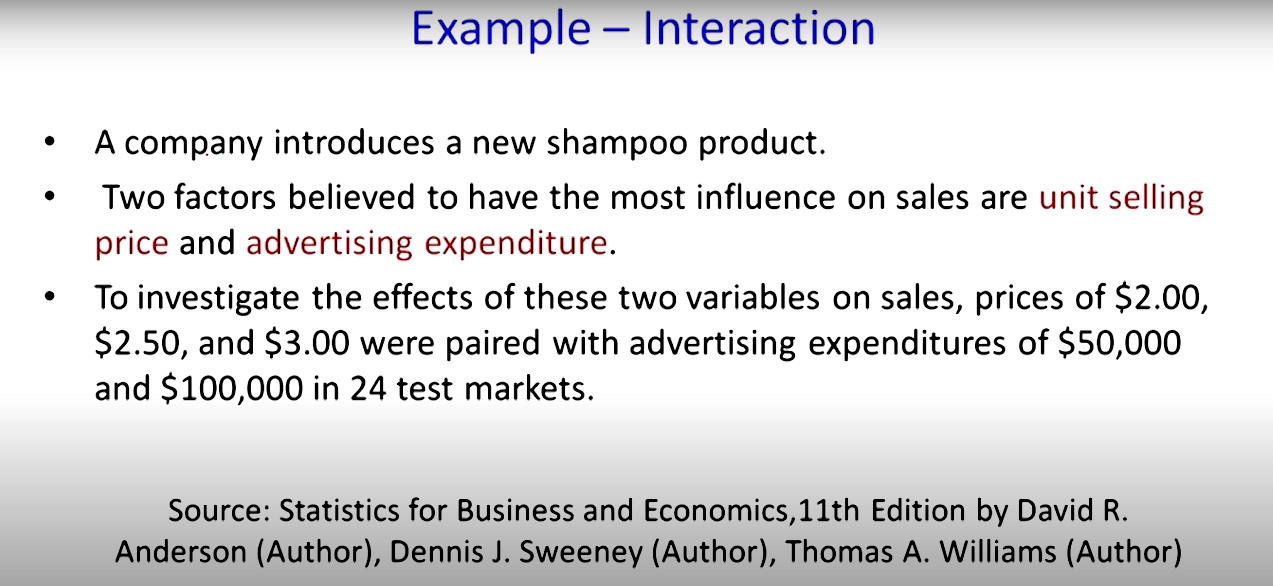

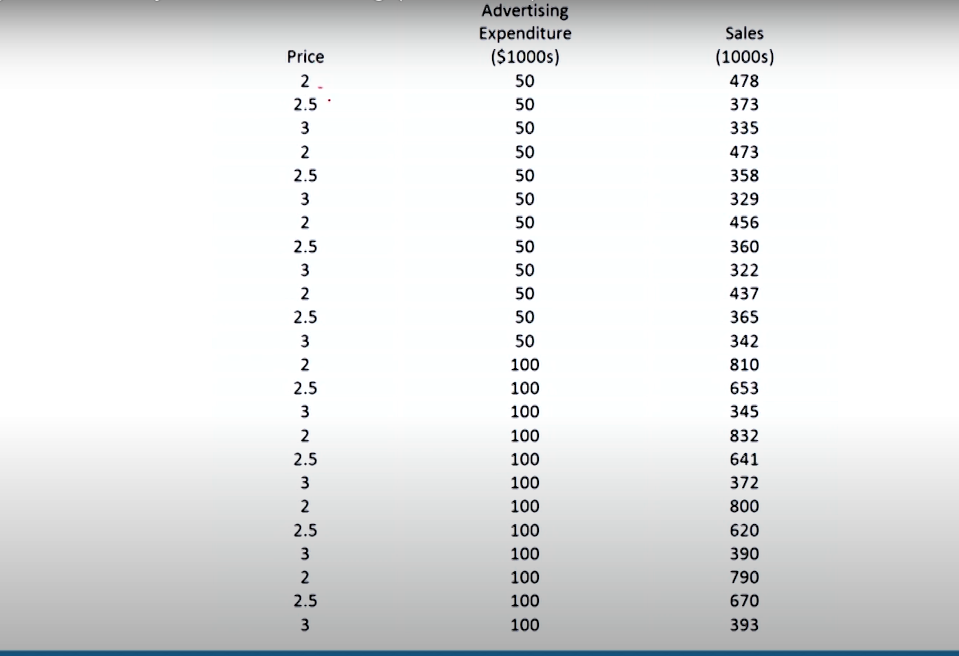

## SOLUTION::

In [1]:
import pandas as pd

data = pd.read_excel("/home/ashish/projects/Regression_interaction_BW_vars/Tyler.xlsx")
data

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358
5,3.0,50,329
6,2.0,50,456
7,2.5,50,360
8,3.0,50,322
9,2.0,50,437


In [2]:
sales = data['Sales(1000s)']
price = data['Price']
adv = data['AdvertisingExpenditure($1000s)']

Text(0.5, 1.0, 'Sales VS Price')

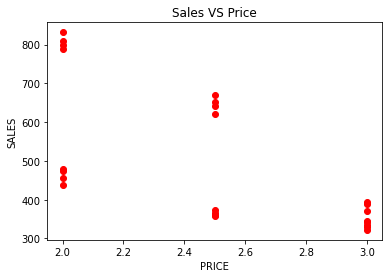

In [7]:
import matplotlib.pyplot as plt
## Sales VS Price scatter plot
plt.scatter(price,sales,color='red')
plt.xlabel("PRICE")
plt.ylabel("SALES")
plt.title("Sales VS Price")

Text(0.5, 1.0, 'Advertismenet_expenditure VS Sales')

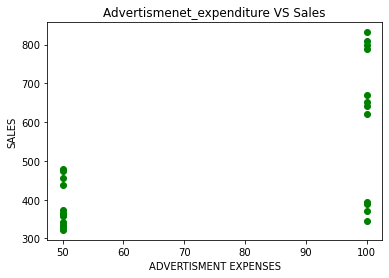

In [8]:
## Advertismenet_expenditure VS Sales
plt.scatter(adv,sales,color='green')
plt.ylabel("SALES")
plt.xlabel("ADVERTISMENT EXPENSES")
plt.title("Advertismenet_expenditure VS Sales")

As we can see the sales not directly increasing with increasing advertisement expenditure. This hints us that there is a interaction effect of prices with advertisement expenditure.

In [12]:
import numpy as np
import statsmodels.api as sm

x = np.column_stack((adv,price))
x = sm.add_constant(x)
model = sm.OLS(sales,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales(1000s)   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     59.82
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           2.13e-09
Time:                        03:32:26   Log-Likelihood:                -135.03
No. Observations:                  24   AIC:                             276.1
Df Residuals:                      21   BIC:                             279.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        864.1667    101.025      8.554      0.000     654.074    1074.259
x1             4.4800      0.586      7.641      0.000       3.261       5.699
x2          -281.0000     35.905     -7.826      0.000    -355.669    -206.331
==============================================================================
Omnibus:                        5.905   Durbin-Watson:                   2.615
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                1.835
Skew:                          -0.162   Prob(JB):                        0.400
Kurtosis:                       1.685   Cond. No.                         572.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary Table
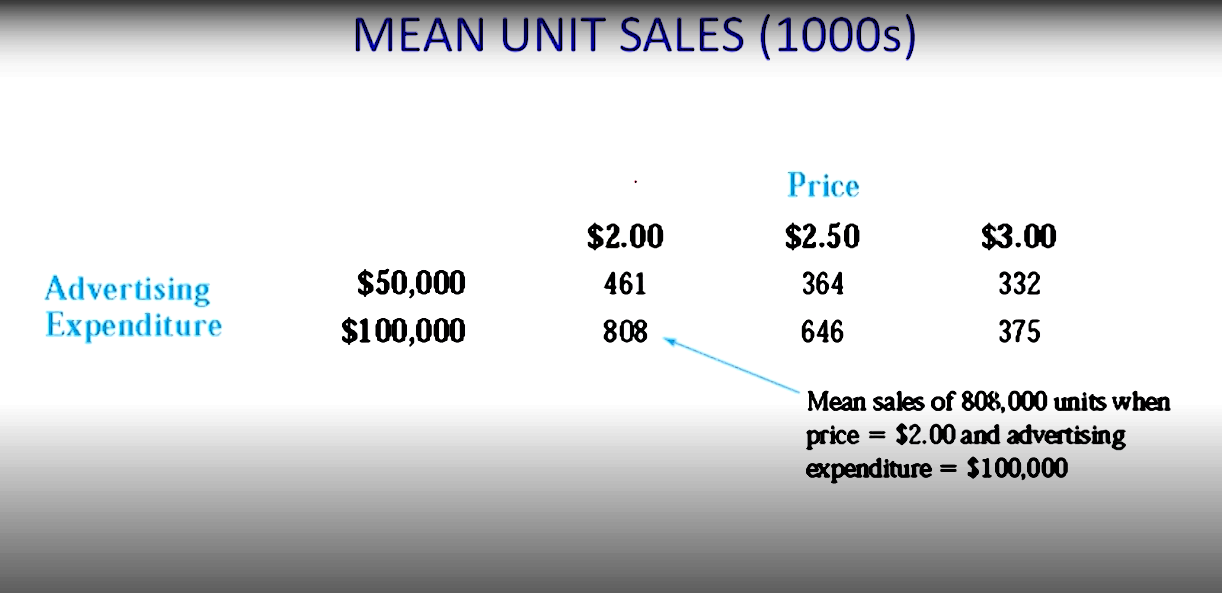

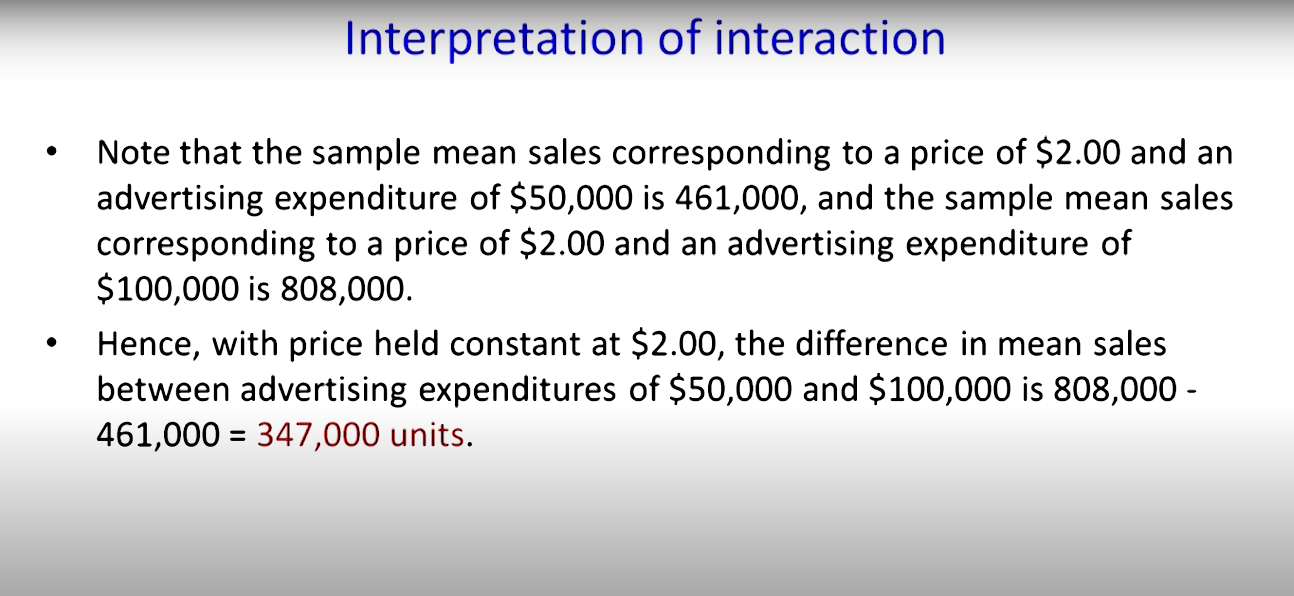

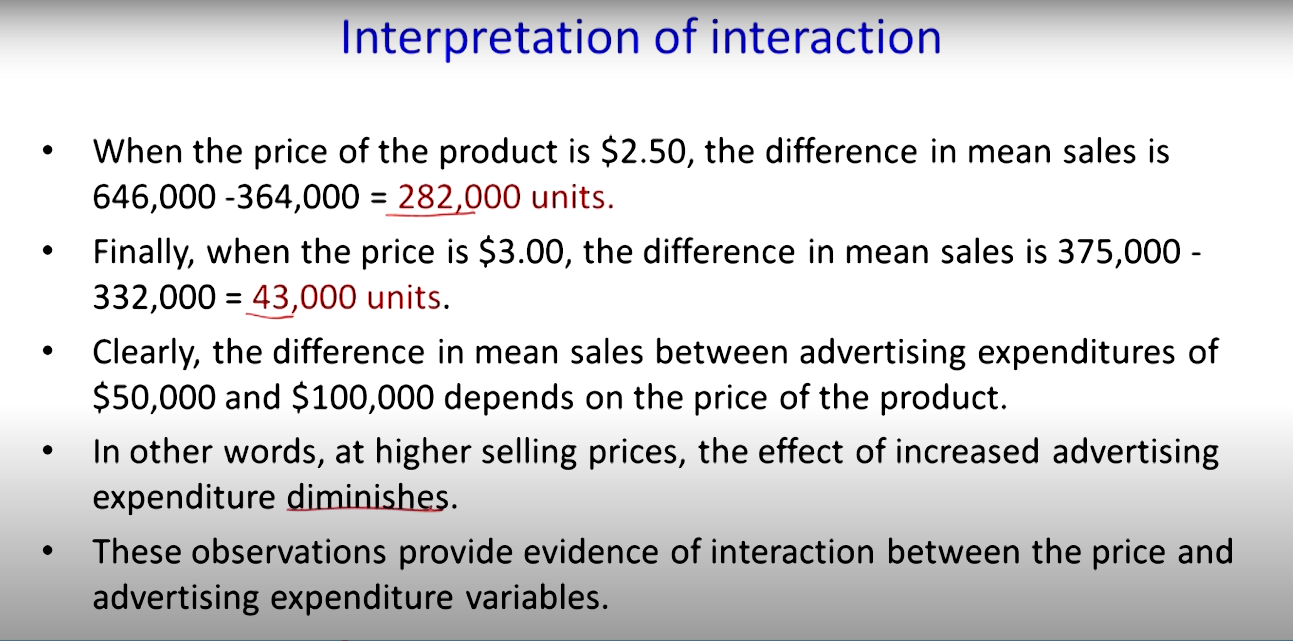

# NOW CONSIDERING THE INTERACTION EFFECT INTO ACCOUNT OF REGRESSION

In [14]:
sales = data['Sales(1000s)']
price = data['Price']
adv = data['AdvertisingExpenditure($1000s)']

interaction = price*adv
interaction

0     100.0
1     125.0
2     150.0
3     100.0
4     125.0
5     150.0
6     100.0
7     125.0
8     150.0
9     100.0
10    125.0
11    150.0
12    200.0
13    250.0
14    300.0
15    200.0
16    250.0
17    300.0
18    200.0
19    250.0
20    300.0
21    200.0
22    250.0
23    300.0
dtype: float64

In [16]:
x_new = np.column_stack((adv,price,interaction))
x_new = sm.add_constant(x_new)
model2 = sm.OLS(sales,x_new).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           9.26e-17
Time:                        03:41:20   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.024    -511.218     -40.449
x1            19.6800      1.427     13.788      0.000      16.703      22.657
x2           175.0000     44.547      3.928      0.001      82.077     267.923
x3            -6.0800      0.563    -10.790      0.000      -7.255      -4.905
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   2.842
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.565
Skew:                           0.335   Prob(JB):                        0.754
Kurtosis:                       2.661   Cond. No.                     4.53e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

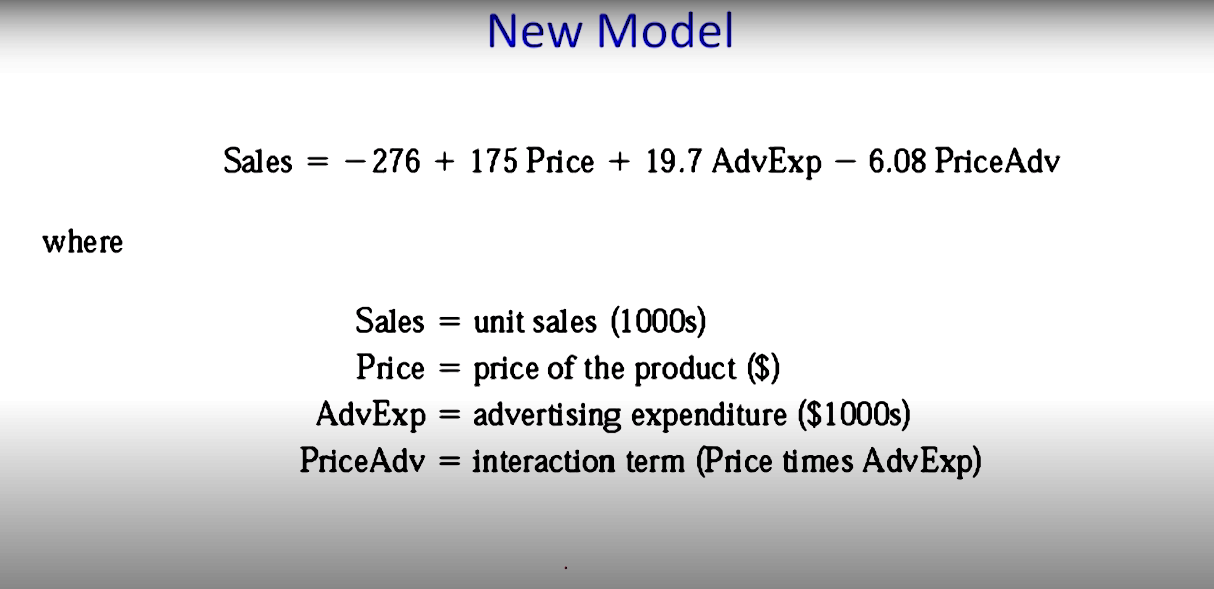

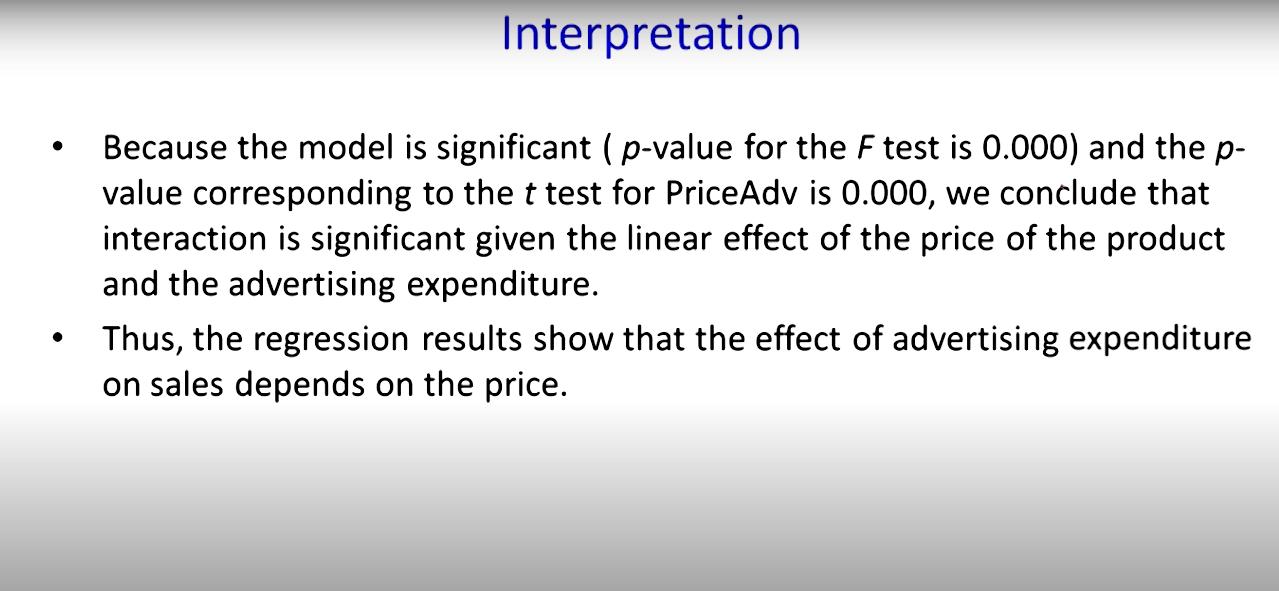